# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [5]:
import sqlite3

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# TODO: Set up a connection the "Market.db" database

conn = sqlite3.connect("db/Market.db")

# TODO: Set up the cursor

cursor = conn.cursor()

### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

- Based on our products table, the the number of products that cost less than 10 EUR is **11**.

**Hint**: You can apply an aggregate function to an entire table.

In [7]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT COUNT(ProductName) as NumberOfProducts
    FROM Products
    WHERE Price < 10
""")

rows = cursor.fetchall()
print(rows)

for r in rows: 
    print(r)

[(11,)]
(11,)


### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

- The most common country of orgin in the suppliers table is the **United States of America**. 

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [4]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT Country, COUNT(Country) As Country_Count
    FROM Suppliers
    Group BY Country
    ORDER BY COUNT(Country) DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

# Iterate through the rows and print each country and its count
for c in rows:
    print(c)

[('USA', 4), ('Germany', 3), ('France', 3), ('UK', 2), ('Sweden', 2), ('Japan', 2), ('Italy', 2), ('Canada', 2), ('Australia', 2), ('Spain', 1), ('Singapore', 1), ('Norway', 1), ('Netherlands', 1), ('Finland', 1), ('Denmark', 1), ('Brazil', 1)]
('USA', 4)
('Germany', 3)
('France', 3)
('UK', 2)
('Sweden', 2)
('Japan', 2)
('Italy', 2)
('Canada', 2)
('Australia', 2)
('Spain', 1)
('Singapore', 1)
('Norway', 1)
('Netherlands', 1)
('Finland', 1)
('Denmark', 1)
('Brazil', 1)


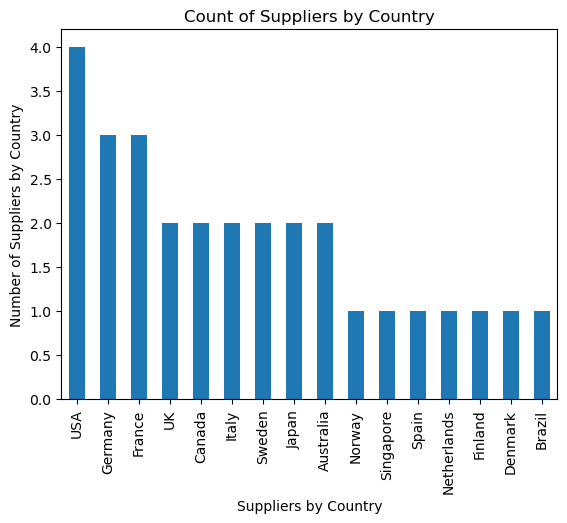

<Figure size 640x480 with 0 Axes>

In [5]:
# TODO: Convert your list of tuples to a dataframe
my_tuple = (('USA', 4), ('UK', 2), ('Sweden', 2), ('Spain', 1), ('Singapore', 1), ('Norway', 1), ('Netherlands', 1), ('Japan', 2), ('Italy', 2), ('Germany', 3), ('France', 3), ('Finland', 1), ('Denmark', 1), ('Canada', 2), ('Brazil', 1), ('Australia', 2))
df = pd.DataFrame(my_tuple, columns=['Country', 'Country_Count'])

# TODO: Generate a visualization on this dataframe
df.sort_values(by='Country_Count', ascending=False).plot(kind='bar', x='Country', y='Country_Count', legend=False)
plt.xlabel('Suppliers by Country')
plt.ylabel('Number of Suppliers by Country')
plt.title('Count of Suppliers by Country')
plt.show()
plt.savefig('Count of Supplers.png')

### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

- The most common counry of orgin in the Customers table is that of the **United States** with **13** customers. 

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [22]:
# TODO: Write a SQL query which will answer the question above.

cursor.execute("""
    SELECT Country, COUNT(Country) As Common_country
    FROM Customers
    Group BY Country
    ORDER BY COUNT(Country) DESC;
""")

# TODO: Fetch your list of tuples and print it out

Country_tuple = cursor.fetchall()
print(Country_tuple)

for com in Country_tuple:
    print(com)

[('USA', 13), ('Germany', 11), ('France', 11), ('Brazil', 9), ('UK', 7), ('Spain', 5), ('Mexico', 5), ('Venezuela', 4), ('Italy', 3), ('Canada', 3), ('Argentina', 3), ('Switzerland', 2), ('Sweden', 2), ('Portugal', 2), ('Finland', 2), ('Denmark', 2), ('Belgium', 2), ('Austria', 2), ('Poland', 1), ('Norway', 1), ('Ireland', 1)]
('USA', 13)
('Germany', 11)
('France', 11)
('Brazil', 9)
('UK', 7)
('Spain', 5)
('Mexico', 5)
('Venezuela', 4)
('Italy', 3)
('Canada', 3)
('Argentina', 3)
('Switzerland', 2)
('Sweden', 2)
('Portugal', 2)
('Finland', 2)
('Denmark', 2)
('Belgium', 2)
('Austria', 2)
('Poland', 1)
('Norway', 1)
('Ireland', 1)


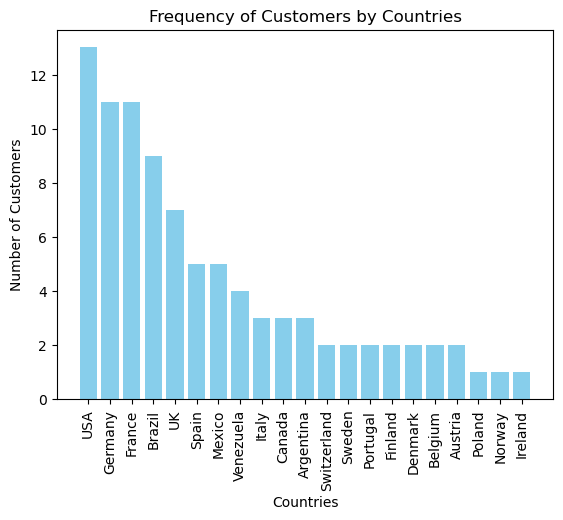

In [ ]:
# TODO: Convert your list of tuples to a dataframe
#Country_tuple = (('USA', 13), ('Germany', 11), ('France', 11), ('Brazil', 9), ('UK', 7), ('Spain', 5), ('Mexico', 5), ('Venezuela', 4), ('Italy', 3), ('Canada', 3), ('Argentina', 3), ('Switzerland', 2), ('Sweden', 2), ('Portugal', 2), ('Finland', 2), ('Denmark', 2), ('Belgium', 2), ('Austria', 2), ('Poland', 1), ('Norway', 1), ('Ireland', 1))
df = pd.DataFrame(Country_tuple, columns=['Country','Common_Country'])

# TODO: Generate a visualization on this dataframe

plt.bar(df['Country'], df['Common_Country'], color='skyblue')
plt.title ('Frequency of Customers by Countries')
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Number of Customers')
plt.show()
plt.savefig('Frequency of Customers by Country.png')

### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

 - The 3 least popular products bsed on order quantity still avaliable:

1) Schoggi Schokolade and Louisiana Hot Spiced Okra (**Quantity = 90 products**)
2) Ikura (**Quantity = 85 products**)
3) Aniseed Syrup(**Quantity = 80 products**)


**Hint**: You will have to perform a join to calculate this answer.

In [20]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT p.ProductName, SUM(od.Quantity) as Least_Popular
    FROM OrderDetails as od
    Join Products as p
    ON od.ProductId = p.ProductId
    GROUP BY p.ProductName
    ORDER BY Least_Popular ASC
    LIMIT 20
""")

# TODO: Fetch your list of tuples and print it out

least_pop_product = cursor.fetchall()
print(least_pop_product)

for Q in least_pop_product:
    print(Q)


[('Laughing Lumberjack Lager', 5), ('Røgede sild', 15), ("Gustaf's Knäckebröd", 18), ('Mishi Kobe Niku', 20), ('Genen Shouyu', 25), ("Uncle Bob's Organic Dried Pears", 25), ('Queso Manchego La Pastora', 27), ("Grandma's Boysenberry Spread", 36), ('Gravad lax', 39), ('Röd Kaviar', 45), ('Filo Mix', 48), ('Mascarpone Fabioli', 52), ('Chocolade', 70), ('Valkoinen suklaa', 70), ('NuNuCa Nuß-Nougat-Creme', 71), ('Singaporean Hokkien Fried Mee', 77), ('Aniseed Syrup', 80), ('Ikura', 85), ('Louisiana Hot Spiced Okra', 90), ('Schoggi Schokolade', 90)]
('Laughing Lumberjack Lager', 5)
('Røgede sild', 15)
("Gustaf's Knäckebröd", 18)
('Mishi Kobe Niku', 20)
('Genen Shouyu', 25)
("Uncle Bob's Organic Dried Pears", 25)
('Queso Manchego La Pastora', 27)
("Grandma's Boysenberry Spread", 36)
('Gravad lax', 39)
('Röd Kaviar', 45)
('Filo Mix', 48)
('Mascarpone Fabioli', 52)
('Chocolade', 70)
('Valkoinen suklaa', 70)
('NuNuCa Nuß-Nougat-Creme', 71)
('Singaporean Hokkien Fried Mee', 77)
('Aniseed Syrup', 

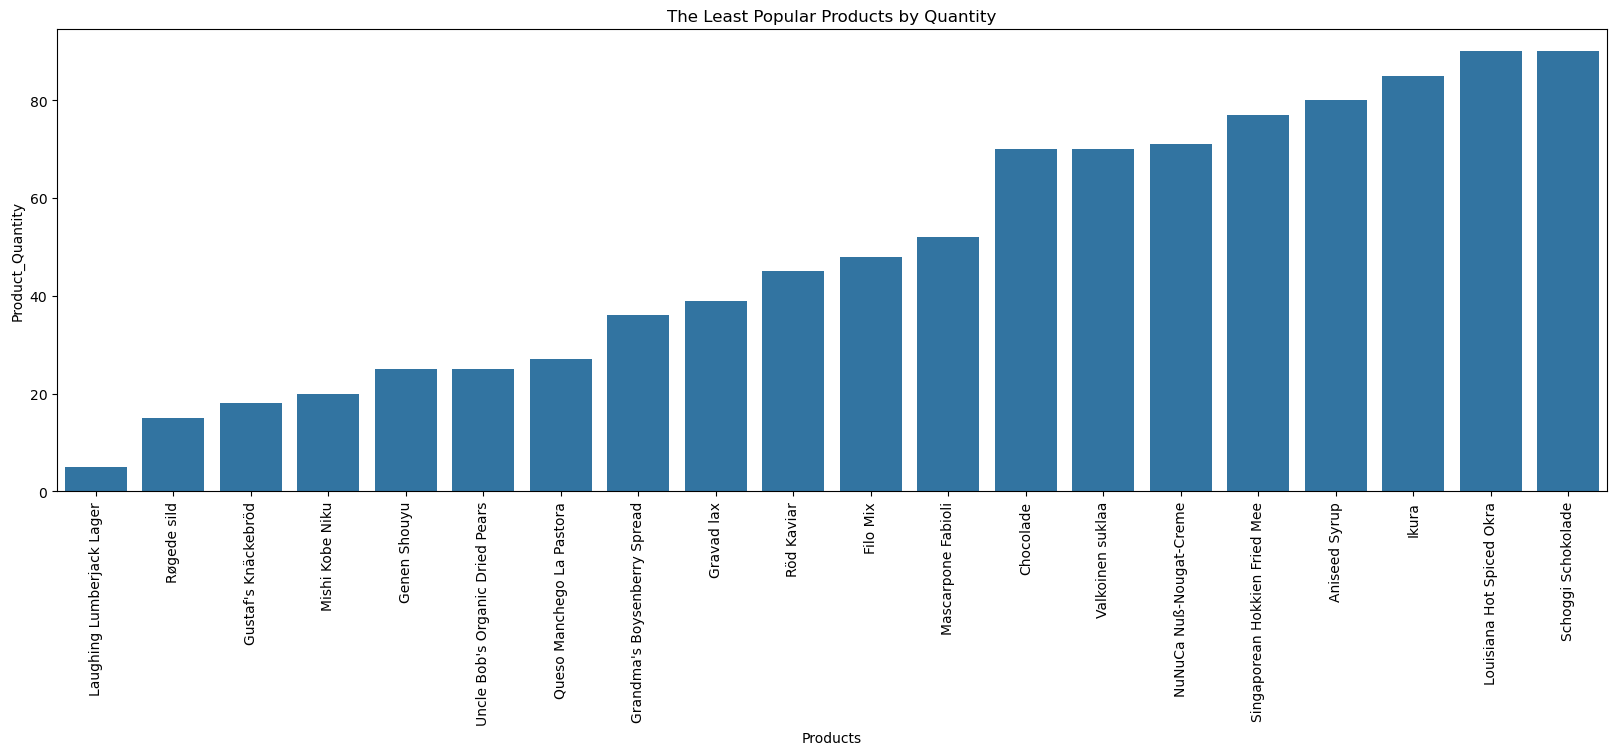

In [ ]:
# TODO: Convert your list of tuples to a dataframe
#least_pop_product = ('Laughing Lumberjack Lager', 5), ('Røgede sild', 15), ("Gustaf's Knäckebröd", 18), ('Mishi Kobe Niku', 20), ('Genen Shouyu', 25), ("Uncle Bob's Organic Dried Pears", 25), ('Queso Manchego La Pastora', 27), ("Grandma's Boysenberry Spread", 36), ('Gravad lax', 39), ('Röd Kaviar', 45), ('Filo Mix', 48), ('Mascarpone Fabioli', 52), ('Chocolade', 70), ('Valkoinen suklaa', 70), ('NuNuCa Nuß-Nougat-Creme', 71), ('Singaporean Hokkien Fried Mee', 77), ('Aniseed Syrup', 80), ('Ikura', 85), ('Louisiana Hot Spiced Okra', 90), ('Schoggi Schokolade', 90)
df = pd.DataFrame(least_pop_product, columns=['Products','Product_Quantity'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize =(20,6))
sns.barplot(x='Products', y='Product_Quantity', data=df)
plt.xticks(rotation=90)
plt.title('The Least Popular Products by Quantity')
plt.show()
plt.savefig('The Least Popular Products by Quantity.png')

### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

 - The top **5** least products based on Revenue is: 

 1) Laughing Lumberjack Lager - 70 Euro
 2) Røgede sild - 142.5 Euro
 3) Filo Mix -  336 Euro
 4) Gustaf's Knäckebröd - 378 Euro
 5) Genen Shouyu - 387.5 Euro
 
**Hint**: You will have to perform a join to calculate this answer.

In [18]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT p.ProductName, SUM(od.Quantity * p.Price) as Total_Revenue
    FROM OrderDetails as od
    Join Products as p
    ON od.ProductId = p.ProductId
    GROUP BY p.ProductName 
    ORDER BY Total_Revenue ASC
""")

# TODO: Fetch your list of tuples and print it out
revenue = cursor.fetchall()
print(revenue)

for r in revenue:
    print(r)


[('Laughing Lumberjack Lager', 70), ('Røgede sild', 142.5), ('Filo Mix', 336), ("Gustaf's Knäckebröd", 378), ('Genen Shouyu', 387.5), ('Konbu', 552), ('Röd Kaviar', 675), ('Guaraná Fantástica', 711.0), ("Uncle Bob's Organic Dried Pears", 750), ('Geitost', 790.0), ('Aniseed Syrup', 800), ('Chocolade', 892.5), ("Grandma's Boysenberry Spread", 900), ('Zaanse koeken', 959.5), ('NuNuCa Nuß-Nougat-Creme', 994), ('Gravad lax', 1014), ('Queso Manchego La Pastora', 1026), ('Singaporean Hokkien Fried Mee', 1078), ('Rhönbräu Klosterbier', 1116.0), ('Valkoinen suklaa', 1137.5), ("Jack's New England Clam Chowder", 1341.35), ('Original Frankfurter grüne Soße', 1404), ("Sir Rodney's Scones", 1470), ('Tunnbröd', 1485), ('Louisiana Hot Spiced Okra', 1530), ('Sasquatch Ale', 1540), ('Mascarpone Fabioli', 1664), ('Teatime Chocolate Biscuits', 1665.2), ('Spegesild', 1740), ('Longlife Tofu', 1860), ('Mishi Kobe Niku', 1940), ('Escargots de Bourgogne', 2053.75), ('Tourtière', 2086.0), ("Chef Anton's Cajun S

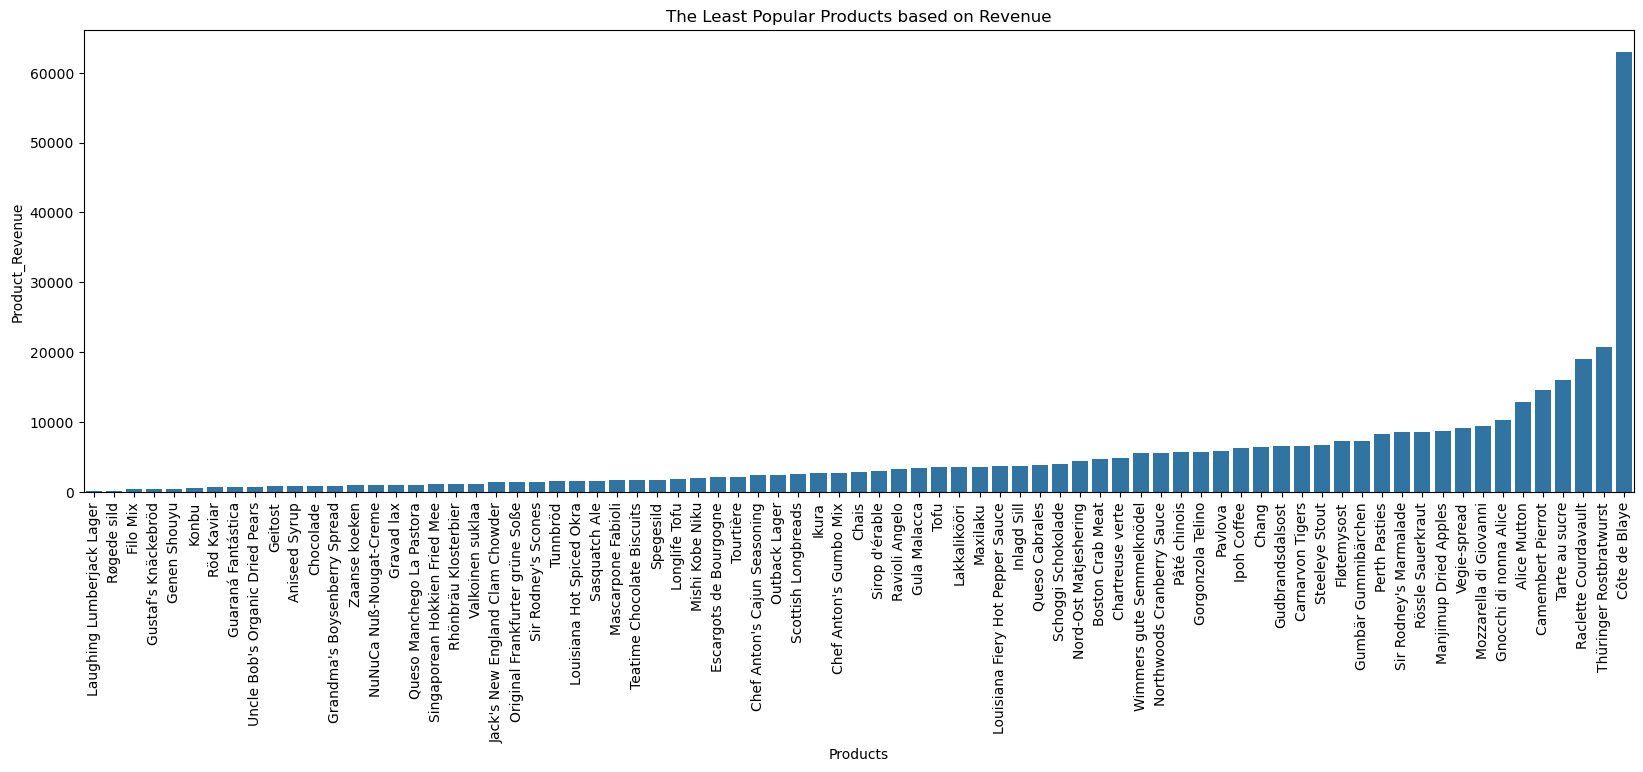

In [ ]:
# TODO: Convert your list of tuples to a dataframe
#revenue = [('Laughing Lumberjack Lager', 70), ('Røgede sild', 142.5), ('Filo Mix', 336), ("Gustaf's Knäckebröd", 378), ('Genen Shouyu', 387.5), ('Konbu', 552), ('Röd Kaviar', 675), ('Guaraná Fantástica', 711.0), ("Uncle Bob's Organic Dried Pears", 750), ('Geitost', 790.0), ('Aniseed Syrup', 800), ('Chocolade', 892.5), ("Grandma's Boysenberry Spread", 900), ('Zaanse koeken', 959.5), ('NuNuCa Nuß-Nougat-Creme', 994), ('Gravad lax', 1014), ('Queso Manchego La Pastora', 1026), ('Singaporean Hokkien Fried Mee', 1078), ('Rhönbräu Klosterbier', 1116.0), ('Valkoinen suklaa', 1137.5), ("Jack's New England Clam Chowder", 1341.35), ('Original Frankfurter grüne Soße', 1404), ("Sir Rodney's Scones", 1470), ('Tunnbröd', 1485), ('Louisiana Hot Spiced Okra', 1530), ('Sasquatch Ale', 1540), ('Mascarpone Fabioli', 1664), ('Teatime Chocolate Biscuits', 1665.2), ('Spegesild', 1740), ('Longlife Tofu', 1860), ('Mishi Kobe Niku', 1940), ('Escargots de Bourgogne', 2053.75), ('Tourtière', 2086.0), ("Chef Anton's Cajun Seasoning", 2354), ('Outback Lager', 2460), ('Scottish Longbreads', 2487.5), ('Ikura', 2635), ("Chef Anton's Gumbo Mix", 2754.15), ('Chais', 2862), ("Sirop d'érable", 3021.0), ('Ravioli Angelo', 3276.0), ('Gula Malacca', 3462.1), ('Tofu', 3534.0), ('Lakkalikööri', 3564), ('Maxilaku', 3600), ('Louisiana Fiery Hot Pepper Sauce', 3683.75), ('Inlagd Sill', 3762), ('Queso Cabrales', 3822), ('Schoggi Schokolade', 3951.0), ('Nord-Ost Matjeshering', 4401.3), ('Boston Crab Meat', 4710.4), ('Chartreuse verte', 4788), ('Wimmers gute Semmelknödel', 5552.75), ('Northwoods Cranberry Sauce', 5600), ('Pâté chinois', 5712), ('Gorgonzola Telino', 5725.0), ('Pavlova', 5898.099999999999), ('Ipoh Coffee', 6256), ('Chang', 6479), ('Gudbrandsdalsost', 6624), ('Carnarvon Tigers', 6625.0), ('Steeleye Stout', 6642), ('Fløtemysost', 7224.0), ('Gumbär Gummibärchen', 7245.36), ('Perth Pasties', 8232.8), ("Sir Rodney's Marmalade", 8586), ('Rössle Sauerkraut', 8618.4), ('Manjimup Dried Apples', 8639), ('Vegie-spread', 9175.1), ('Mozzarella di Giovanni', 9396.0), ('Gnocchi di nonna Alice', 10222), ('Alice Mutton', 12909), ('Camembert Pierrot', 14620), ('Tarte au sucre', 16022.5), ('Raclette Courdavault', 19030), ('Thüringer Rostbratwurst', 20796.72), ('Côte de Blaye', 62976.5)]
df = pd.DataFrame(revenue, columns=['Products','Product_Revenue'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize =(20,6))
sns.barplot(x='Products', y='Product_Revenue', data=df)
plt.xticks(rotation=90)
plt.title('The Least Popular Products based on Revenue')
plt.show()
plt.savefig('The Least Popular Products Based on Revenue.png')

### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

- The top **3** countries that have the most orders are the United States of America (29 orders), Germany (25 orders) and Brazil (19 orders).

**Hint**: You will have to perform a join to calculate this answer.

In [8]:
# TODO: Write a SQL query which will answer the question above.

cursor.execute("""
    SELECT c.country, COUNT(o.OrderID) as Max_Orders
    FROM Orders as o
    Join Customers as c
    ON c.CustomerID = o.CustomerID
    GROUP BY c.Country
    ORDER BY Max_Orders DESC
""")
# TODO: Fetch your list of tuples and print it out

Countries_max = cursor.fetchall()
print(Countries_max)

for O in rows:
    print(O)

[('USA', 29), ('Germany', 25), ('Brazil', 19), ('France', 18), ('Austria', 13), ('UK', 12), ('Venezuela', 9), ('Mexico', 9), ('Canada', 9), ('Finland', 8), ('Sweden', 7), ('Spain', 7), ('Italy', 7), ('Ireland', 6), ('Portugal', 5), ('Switzerland', 4), ('Denmark', 4), ('Belgium', 2), ('Poland', 1), ('Norway', 1), ('Argentina', 1)]
(11,)


/var/folders/_r/d_6wgsg55bb25pbx2c73z2jc0000gn/T/ipykernel_39274/3438131729.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Most_Orders', y='Countries', data=df,palette='viridis')


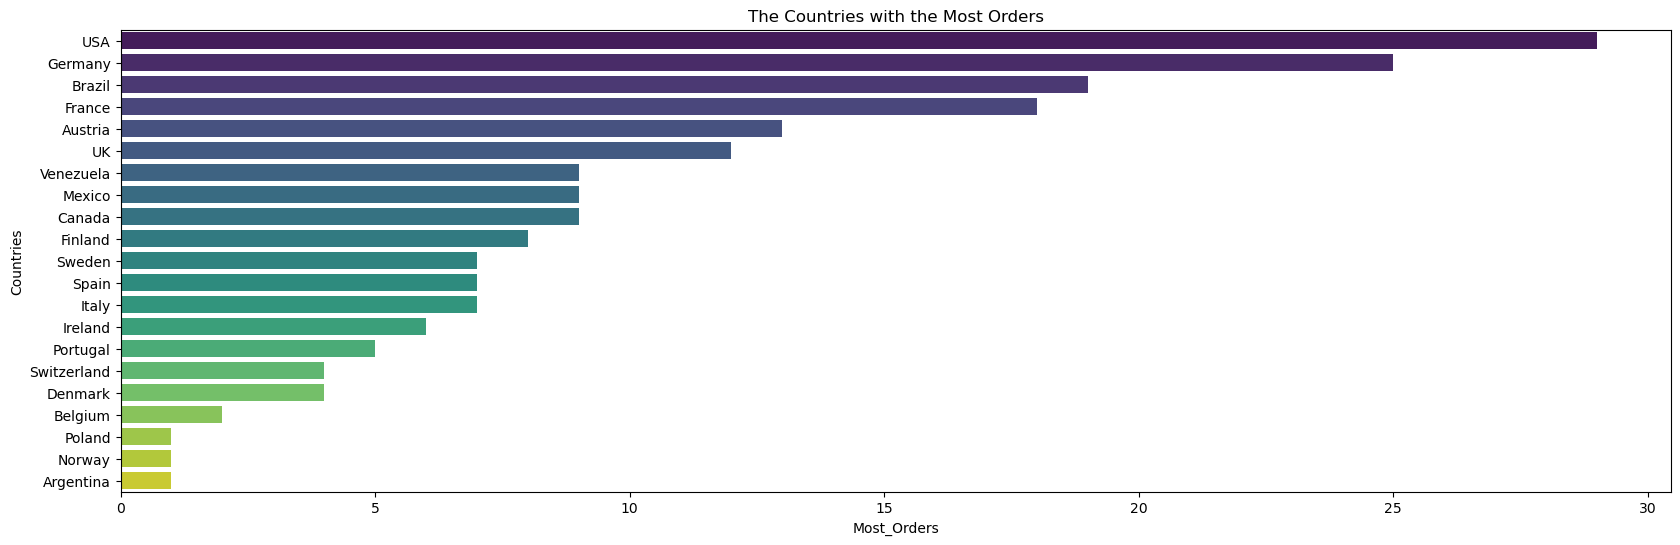

In [ ]:
# TODO: Convert your list of tuples to a dataframe
#Countries_max = ('USA', 29), ('Germany', 25), ('Brazil', 19), ('France', 18), ('Austria', 13), ('UK', 12), ('Venezuela', 9), ('Mexico', 9), ('Canada', 9), ('Finland', 8), ('Sweden', 7), ('Spain', 7), ('Italy', 7), ('Ireland', 6), ('Portugal', 5), ('Switzerland', 4), ('Denmark', 4), ('Belgium', 2), ('Poland', 1), ('Norway', 1), ('Argentina', 1)
df = pd.DataFrame(Countries_max, columns=['Countries','Most_Orders'])

# TODO: Generate a visualization on this dataframe

plt.figure(figsize =(20,6))
sns.barplot(x='Most_Orders', y='Countries', data=df,palette='viridis')
plt.title('The Countries with the Most Orders')
plt.show()
plt.savefig('The Countries with the Most Orders.png')

### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

- The countries that had at least one customer who had not placed on orders are Argentina, Belgium, Canada, France, Germany, Spain, UK and the USA.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [9]:
# TODO: Write a SQL query which will answer the question above.

cursor.execute("""
               
    SELECT c.Country, Count(c.CustomerID) 
    FROM Customers as c
    LEFT JOIN Orders as o
    ON c.CustomerID = o.CustomerID 
    WHERE o.CustomerID IS NULL  
    GROUP BY Country
""")

# TODO: Fetch your list of tuples and print it out
no_orders_countries = cursor.fetchall()
print(no_orders_countries)

for no in no_orders_countries:
    print(no)

[('Argentina', 2), ('Belgium', 1), ('Canada', 1), ('France', 4), ('Germany', 2), ('Spain', 1), ('UK', 1), ('USA', 5)]
('Argentina', 2)
('Belgium', 1)
('Canada', 1)
('France', 4)
('Germany', 2)
('Spain', 1)
('UK', 1)
('USA', 5)


Text(0.5, 1.0, 'Countries with Customers Who Do Not Order')

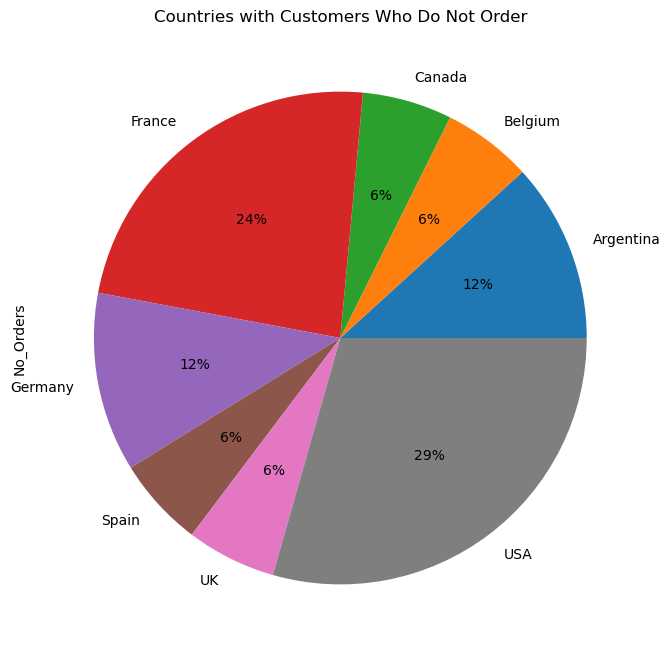

In [ ]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(data = no_orders_countries, columns =['Country','No_Orders'])

# TODO: Generate a visualization on this dataframe
df.groupby(['Country']).sum().plot(kind='pie', y = 'No_Orders', autopct = '%1.0f%%', legend=False, figsize=(8,8))
plt.title('Countries with Customers Who Do Not Order')
plt.savefig('Countries with Customers Who Do Not Orders.png')

### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

The most **5** popular suppliers based on the order count are: 
1) Plutzer Lebensmittelgroßmärkte AG - 42 Orders
2) Pavlova, Ltd. - 40 Orders
3) Specialty Biscuits, Ltd. - 33 Orders
4) Norske Meierier - 32 Orders
5) Formaggi Fortini s.r.l. - 31 Orders

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [ ]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
               
   SELECT s.SupplierName, COUNT(od.OrderID) as Pop_Suppliers
   From Suppliers as s
   INNER JOIN Products as p
   ON s.SupplierID = p.SupplierID
   JOIN OrderDetails as od
   ON p.ProductID = Od.ProductID
   Group BY s.SupplierName
   ORDER BY Pop_Suppliers DESC
""")

# TODO: Fetch your list of tuples and print it out
Pop_Suppliers = cursor.fetchall()
print(Pop_Suppliers)

for s in Pop_Suppliers:
   print(s)


[('Plutzer Lebensmittelgroßmärkte AG', 42), ('Pavlova, Ltd.', 40), ('Specialty Biscuits, Ltd.', 33), ('Norske Meierier', 32), ('Formaggi Fortini s.r.l.', 31), ('Gai pâturage', 26), ('Exotic Liquid', 21), ('Pasta Buttini s.r.l.', 20), ('New Orleans Cajun Delights', 20), ('Ma Maison', 19), ('Karkki Oy', 19), ("G'day, Mate", 19), ('New England Seafood Cannery', 17), ("Mayumi's", 17), ('Leka Trading', 17), ('Bigfoot Breweries', 16), ('Heli Süßwaren GmbH & Co. KG', 15), ("Forêts d'érables", 15), ('Aux joyeux ecclésiastiques', 15), ('Svensk Sjöföda AB', 14), ('Tokyo Traders', 12), ('Refrescos Americanas LTDA', 11), ("Cooperativa de Quesos 'Las Cabras'", 11), ('Nord-Ost-Fisch Handelsgesellschaft mbH', 8), ('Lyngbysild', 8), ('PB Knäckebröd AB', 6), ("Grandma Kelly's Homestead", 6), ('Zaanse Snoepfabriek', 4), ('Escargots Nouveaux', 4)]
('Plutzer Lebensmittelgroßmärkte AG', 42)
('Pavlova, Ltd.', 40)
('Specialty Biscuits, Ltd.', 33)
('Norske Meierier', 32)
('Formaggi Fortini s.r.l.', 31)
('Gai 

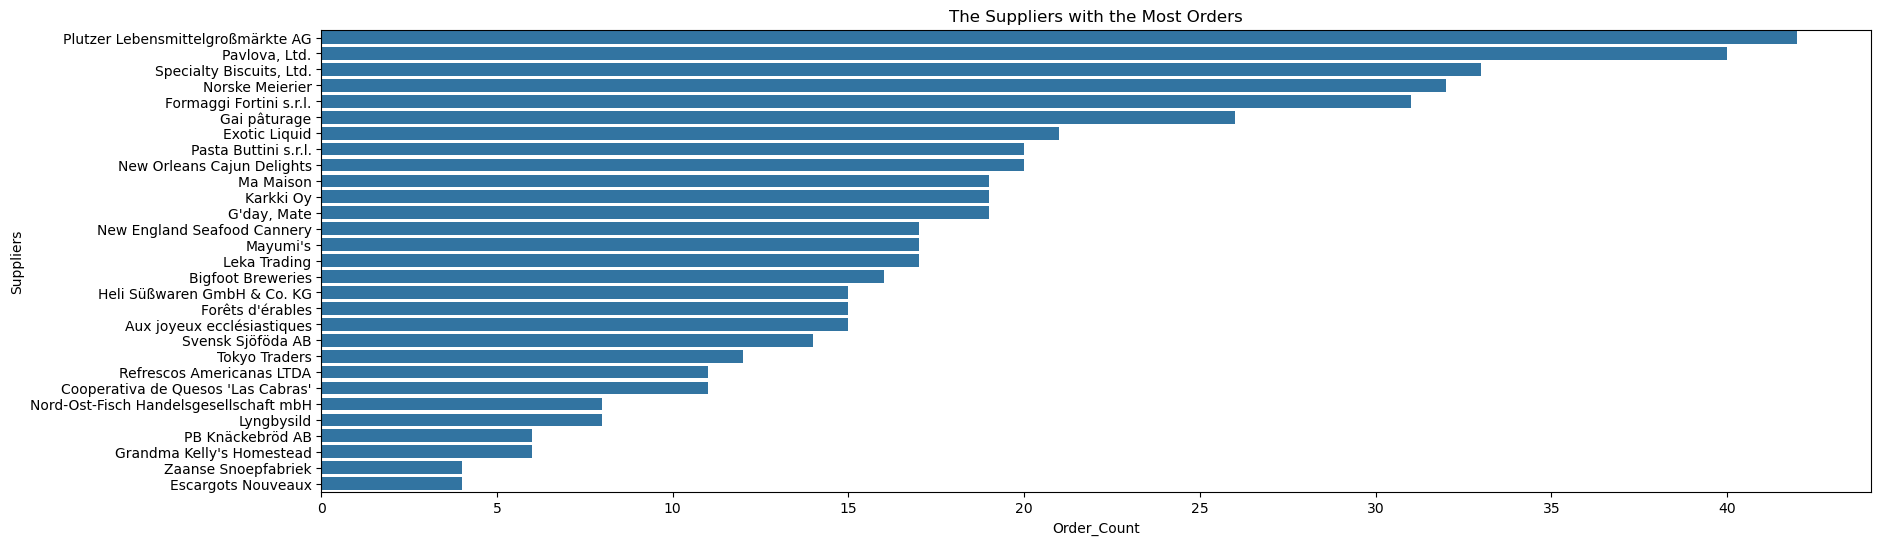

In [ ]:
# TODO: Convert your list of tuples to a dataframe

df = pd.DataFrame(data = Pop_Suppliers, columns =['Suppliers','Order_Count'])

# TODO: Generate a visualization on this dataframe
plt.figure(figsize =(20,6))
sns.barplot(x='Order_Count', y='Suppliers', data=df)
plt.title('The Suppliers with the Most Orders')
plt.show()
plt.savefig('The Suppliers with the Most Orders.png')

## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?

According to the reports from the last fiscal year, we can see that the top **5** countries with the greatest number of customers were:

1) **The United States** - 13 customers
2) **Germany and France** - 11 customers
3) **Brazil** - 9 customers
4) **United Kingdom** - 7 Customers 

If we were to look at the most frequent countries by the supplier, we can see the following information: 

1) **United States** - 4 suppliers
2) **Germany** - 3 suppliers
3) **France** - 3 suppliers
4) **United Kingdom, Sweden, Japan, Italy, Canada and Australia** - 2 Suppliers
5) **Spain, Singapore, Norway, Netherlands, Finland, Denmark, Brazil** - 1 Supplier

Based on this data, we can see that the United States, Germany, and France have the highest number of customers and the highest number of customers and suppliers. We can see that there is relationship between the number of customers and the number of suppliers in the countries. On the other hand, we can see that Brazil had 9 customers, but only had one supplier. We can that for at least three of the countries having more customers can lead to more suppliers. The only outlier to this was Brazil, with the 3rd highest number of customers with the least amount of supplies.  


### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

Based on the order quantity data, we can see that the least popular product based upon order quantity was that of the **Laughing Lumberjack Lager**, with a order quanity of 5. 
If if you were to look at the products with the least products based on revenue, we can see that once again **Laughing LumberJack Lager** fell last with only 70 euros of revenue. 

This highlights the correlation between a product's popularity and the financial success of the prodcut for consumer and sellers. We can see that the lack of popularity for the Lager can impact the revenue. 


### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?


The country that had the most orders was the United States with 29 customers followed closely by Germany and Brazil, with 25 and 19 orders respectively. Conversely, we can see that the countries with customers who did not have at least one order include the following countries: 

1) **Argentina** - 2 customers
2) **Belgium** - 1 customer
3) **Canada** - 1 customer
4) **France** - 4 customers 
5) **Germany** - 2 customers
6) **Spain** - 1 customer
7) **United Kingdom** - 1 customer
8) **United States of America** - 5 customers 

 From this information, we observed that the United States has the highest number of customers, it also has the largest number of customers(5), who did not place any orders. Notably, we can see the top countries with the most orders, the United States and Germany, have a higher number of customers placing orders and customers that do not have any orders at all. This indicates that there is there is not a high correlation between the number of customers who do not order and the the countries with the most orders. The only top country that had the highest number of orders placed and the customers who did have orders was Brazil.
 

### Question 4

Which supplier has the most orders? Which evidence supports your answer?

 The supplier with the most orders was Plutzer Lebensmittelgroßmärkte AG, a Germany-based company. This supplier had the highest number of orders, totaling 42, compared to other suppliers, all of whom had fewer than 40 orders last year